load checkpoint from local path: /home/lr/project/mmflow/checkpoints/raft_8x2_100k_mixed_368x768.pth


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd40e2e77f0>)

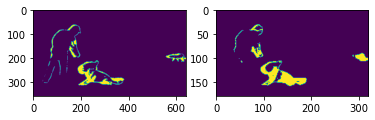

In [46]:
from mmflow.apis import init_model, inference_model
from mmflow.datasets import visualize_flow, write_flow
from mmflow.models.utils import occlusion_estimation
import mmcv
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the path to model config and checkpoint file
config_file = '/home/lr/project/mmflow/configs/raft/raft_8x2_100k_mixed_368x768.py'
checkpoint_file = '/home/lr/project/mmflow/checkpoints/raft_8x2_100k_mixed_368x768.pth'

# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

# test image pair, and save the results
img1='/home/lr/dataset/YouTube-VOS/2018/train_all_frames/JPEGImages/1acd0f993b/00120.jpg'
img2='/home/lr/dataset/YouTube-VOS/2018/train_all_frames/JPEGImages/1acd0f993b/00123.jpg'

img_1 = mmcv.imread(img1)
img_2 = mmcv.imread(img2)

img1 = mmcv.imrescale(img_1, 0.5)
img2 = mmcv.imrescale(img_2, 0.5) 
f1 = torch.from_numpy(inference_model(model, img1, img2)).permute(2,0,1)
w1 = torch.from_numpy(inference_model(model, img2, img1)).permute(2,0,1)
result = occlusion_estimation(f1[None], w1[None])['occ_fw']
result = (1 - np.array(result)[0,0]) * 255
mmcv.imwrite(img1, 'img1.jpg')
mmcv.imwrite(img2, 'img2.jpg')
mmcv.imwrite(result, 'occ1.jpg')



img1 = mmcv.imrescale(img_1, 0.25)
img2 = mmcv.imrescale(img_2, 0.25) 
f1 = torch.from_numpy(inference_model(model, img1, img2)).permute(2,0,1)
w1 = torch.from_numpy(inference_model(model, img2, img1)).permute(2,0,1)
result2 = occlusion_estimation(f1[None], w1[None])['occ_fw']
result2 = (1 - np.array(result2)[0,0]) * 255
mmcv.imwrite(img1, 'img1_.jpg')
mmcv.imwrite(img2, 'img2_.jpg')
mmcv.imwrite(result2, 'occ2.jpg')


plt.figure()
plt.subplot(1,2,1), plt.imshow(result)
plt.subplot(1,2,2), plt.imshow(result2)

# mmcv.imwrite(result, 'occ1.jpg')
# mmcv.imwrite(result2, 'occ2.jpg')




 